<a href="https://colab.research.google.com/github/yeonghun00/stock_public/blob/main/strategy/My strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving hybrid.csv to hybrid (2).csv


In [2]:
key, value = list(uploaded.items())[0]
key

'hybrid.csv'

In [3]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded[key]), encoding='latin-1')
df

,È¸ Â÷,°Ë»ö½ÃÁ¡,ÀüÃ¼ Á¾¸ñ,»ó½Â Á¾¸ñ,Æò±Õ ¼öÀÍ·ü,½ÃÀå¼öÀÍ·ü,Unnamed: 6,½ÃÀå´ëºñ¼öÀÍ·ü,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,ÄÚ½ºÇÇ,ÄÚ½º´Ú,ÄÚ½ºÇÇ,ÄÚ½º´Ú
1,1.0,'2006/01/01,6.0,1.0,-12.94%,-0.25%,-5.79%,-12.69%,-7.15%
2,2.0,'2006/02/01,23.0,15.0,+5.87%,-0.32%,+3.20%,+6.19%,+2.67%
3,3.0,'2006/03/01,21.0,14.0,+11.58%,-0.87%,-2.51%,+12.45%,+14.09%
4,4.0,'2006/04/01,22.0,11.0,+4.82%,+4.42%,+3.04%,+0.40%,+1.78%
...,...,...,...,...,...,...,...,...,...
180,180.0,'2020/12/01,1.0,0.0,-2.72%,+9.08%,+8.65%,-11.80%,-11.37%
181,181.0,'2021/01/01,1.0,1.0,+2.93%,+6.37%,-1.19%,-3.44%,+4.12%
182,182.0,'2021/02/01,0.0,0.0,NaN,NaN,NaN,NaN,NaN
183,183.0,'2021/03/01,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# Encoding 
df = df.rename(columns=dict(zip(df.columns.values, ["num", "date", "total_stocks", "increased_stocks", "average_profit", "market_kospi","market_kosdaq", "ratio_kospi", "ratio_kosdaq"])))

# drop index 0 and last, fill nan to 0%
df = df.drop([0, df.index[-1]]).fillna('0%')

# date, num to appropriate type
df['date'] = df['date'].apply(lambda x: x[1:]).astype('datetime64[ns]')
df['num'] = df['num'].apply(lambda x: int(x))

# Percentage to decimals
for i in df.columns[4:]:
    df[i] = df[i].apply(lambda x: (100+float(x[:-1]))/100)

In [5]:
df

,num,date,total_stocks,increased_stocks,average_profit,market_kospi,market_kosdaq,ratio_kospi,ratio_kosdaq
1,1,2006-01-01,6.0,1.0,0.8706,0.9975,0.9421,0.8731,0.9285
2,2,2006-02-01,23.0,15.0,1.0587,0.9968,1.0320,1.0619,1.0267
3,3,2006-03-01,21.0,14.0,1.1158,0.9913,0.9749,1.1245,1.1409
4,4,2006-04-01,22.0,11.0,1.0482,1.0442,1.0304,1.0040,1.0178
5,5,2006-05-01,9.0,1.0,0.8905,0.9122,0.8940,0.9783,0.9965
...,...,...,...,...,...,...,...,...,...
179,179,2020-11-01,4.0,4.0,1.3192,1.1619,1.1244,1.1573,1.1948
180,180,2020-12-01,1.0,0.0,0.9728,1.0908,1.0865,0.8820,0.8863
181,181,2021-01-01,1.0,1.0,1.0293,1.0637,0.9881,0.9656,1.0412
182,182,2021-02-01,0.0,0.0,1.0000,1.0000,1.0000,1.0000,1.0000


In [6]:
'''mask = (df['date'] >= '2020-01-01') & (df['date'] <= '2021-1-01	')
df = df.loc[mask]
df'''

"mask = (df['date'] >= '2020-01-01') & (df['date'] <= '2021-1-01\t')\ndf = df.loc[mask]\ndf"

In [7]:
# kelly criterion

# f = (b*p - q)/b
# f: 배팅 비율
# b: 배당률
# p: 승리 확률
# q: 패배 확률

In [8]:
from scipy import stats

b = stats.gmean(df['average_profit'].values)
p = df['increased_stocks'].sum() / df['total_stocks'].sum()
q = 1 - p

f = (b * p - q)/b
f

0.22738083174984472

In [9]:
# sharpe ratio

# sr = (rp-rf)/std
# rp: return of portfolio
# rf: risk free rate
# std: std of rp

In [10]:
import numpy as np

rp = stats.gmean(df['average_profit'])
rf = stats.gmean(np.sqrt(df['market_kospi'] * df['market_kosdaq']))
std = np.std(df['average_profit'])

sr = (rp-rf)/std
sr

0.4905416376511336

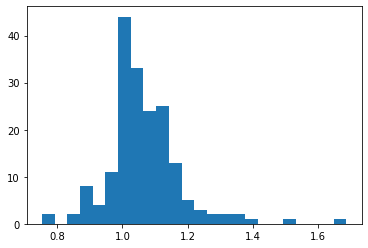

lowest 5th percentile:  0.88618
highest 5th percentile:  1.24538
mean:  1.0578995855934759
median:  1.0452


In [11]:
# Value at Risk

import matplotlib.pyplot as plt
import statistics

plt.hist(df['average_profit'], bins='auto')
plt.show()

print('lowest 5th percentile: ', round(np.percentile(df['average_profit'], 5), 5))
print('highest 5th percentile: ', round(np.percentile(df['average_profit'], 95), 5))
print('mean: ', stats.gmean(df['average_profit']))
print('median: ', statistics.median(df['average_profit']))


In [12]:
print(key)
print()
print('kelly criterion:')
print(round(f, 5))
print()
print('sharpe ratio:')
print(round(sr, 5))
print()
print('Value at Risk:')
print('lowest 5th percentile: ', round(np.percentile(df['average_profit'], 5), 5))
print('highest 5th percentile: ', round(np.percentile(df['average_profit'], 95), 5))
print('mean: ', stats.gmean(df['average_profit']))
print('median: ', statistics.median(df['average_profit']))

hybrid.csv

kelly criterion:
0.22738

sharpe ratio:
0.49054

Value at Risk:
lowest 5th percentile:  0.88618
highest 5th percentile:  1.24538
mean:  1.0578995855934759
median:  1.0452
